# Projekat iz predmeta analiza socijalnih mreza


## Kvantitativna i kvalitativna Analiza stanja profesionalnog muškog tenisa u periodu od 2018. do 2020. godine

2018, 2019 i 2020.godina Analiza - agregirano

Ucitavanje podataka

In [1]:
import pandas as pd

dataPath_2018 = "data/atp_matches_2018.csv"
dataPath_2019 = "data/atp_matches_2019.csv"
dataPath_2020 = "data/atp_matches_2020.csv"

players_dataPath = "data/atp_players.csv"

player_atp_rankings_dataPath = "data/atp_rankings_current.csv"

data_2018 = pd.read_csv(dataPath_2018)
print(data_2018)
data_2019 = pd.read_csv(dataPath_2019) 
print(data_2019)
data_2020 = pd.read_csv(dataPath_2020) 
print(data_2020)

#players
players_data = pd.read_csv(players_dataPath)

#atp ranking
players_atp_rank_data = pd.read_csv(player_atp_rankings_dataPath)
players_atp_rank_data.isna().any()
#points null moze biti
#print(players_atp_rank_data)

                          tourney_id                tourney_name surface  \
0                          2018-M020                    Brisbane    Hard   
1                          2018-M020                    Brisbane    Hard   
2                          2018-M020                    Brisbane    Hard   
3                          2018-M020                    Brisbane    Hard   
4                          2018-M020                    Brisbane    Hard   
...                              ...                         ...     ...   
2884                       2018-0605                 Tour Finals    Hard   
2885                       2018-0605                 Tour Finals    Hard   
2886  2018-M-DC-2018-WG-M-FRA-CRO-01  Davis Cup WG F: FRA vs CRO    Clay   
2887  2018-M-DC-2018-WG-M-FRA-CRO-01  Davis Cup WG F: FRA vs CRO    Clay   
2888  2018-M-DC-2018-WG-M-FRA-CRO-01  Davis Cup WG F: FRA vs CRO    Clay   

      draw_size tourney_level  tourney_date  match_num  winner_id  \
0            32   

ranking_date    False
rank            False
player          False
points          False
dtype: bool

In [2]:
data_2018 = data_2018[['winner_id', 'winner_name', 'winner_ioc', 'loser_id', 'loser_name', 'loser_ioc', 'surface', 'tourney_id', 'tourney_name', 'tourney_date', 'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points']]
data_2019 = data_2019[['winner_id', 'winner_name', 'winner_ioc', 'loser_id', 'loser_name', 'loser_ioc', 'surface', 'tourney_id', 'tourney_name', 'tourney_date', 'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points']]
data_2020 = data_2020[['winner_id', 'winner_name', 'winner_ioc', 'loser_id', 'loser_name', 'loser_ioc', 'surface', 'tourney_id', 'tourney_name', 'tourney_date', 'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points']]
data_all = pd.concat([data_2018, data_2019], ignore_index=True)
data_all = pd.concat([data_all, data_2020], ignore_index=True)

In [3]:
#dodati automatski generisani id kao dodatnu kolonu
data_all['id'] = data_all.index
print(data_all)
print(data_all['id'].is_unique)

#sacuvati u novi fajl
import pickle

with open("data/data_all_cleaned.csv", 'wb') as file:
    pickle.dump(data_all, file)

      winner_id       winner_name winner_ioc  loser_id  \
0        105992     Ryan Harrison        USA    104919   
1        111577   Jared Donaldson        USA    111442   
2        104797     Denis Istomin        UZB    106000   
3        200282    Alex De Minaur        AUS    105449   
4        111581      Michael Mmoh        USA    105643   
...         ...               ...        ...       ...   
7112     105668    Jerzy Janowicz        POL    106388   
7113     209874  Maks Kasnikowski        POL    207852   
7114     208518         Hazem Naw        UNK    200250   
7115     111761     Benjamin Lock        ZIM    200181   
7116     111761     Benjamin Lock        ZIM    208518   

                      loser_name loser_ioc surface  \
0                 Leonardo Mayer       ARG    Hard   
1                Jordan Thompson       AUS    Hard   
2                  Damir Dzumhur       BIH    Hard   
3                  Steve Johnson       USA    Hard   
4              Federico Delbonis 

In [4]:
import networkx as nx

list_winner = set(data_all['winner_id'].apply(str).unique())
#print(list_winner)
list_loser = set(data_all['loser_id'].apply(str).unique())
#print(list_loser)

skup_id = list_winner.union(list_loser)
print(f"Postoji { len(skup_id) } različitih igrača") # formatiranje ispisa pomoću fstringa

Postoji 581 različitih igrača


In [5]:
#videti timestamp u tabeli 10s, iz koje je godine, i koji je datum
#proveriti za podatke za 2018, 2019 u fajlovima koji objasnjavaju meceve, neki mec posle tog datuma koji pise u 10s fajlu
print(players_atp_rank_data.columns)
print(players_atp_rank_data['player'].is_unique)

maska_active_players = players_atp_rank_data['player'].isin(skup_id) & (players_atp_rank_data['ranking_date']<=20201231) & (players_atp_rank_data['ranking_date']>=20180101)
players_rank_2018 = players_atp_rank_data[maska_active_players]
players_rank_all = players_atp_rank_data[maska_active_players]
players_rank_all = players_rank_all.drop_duplicates()

max_players_rank_all = players_rank_all.groupby('player').max()

player_sorted_date_rank_all = players_rank_all.sort_values(['ranking_date'],ascending=False).groupby('player').head(1)

print(player_sorted_date_rank_all.dtypes)
print(players_rank_all.sort_values(['ranking_date'],ascending=False).groupby('player').head(1))


Index(['ranking_date', 'rank', 'player', 'points'], dtype='object')
False
ranking_date    int64
rank            int64
player          int64
points          int64
dtype: object
       ranking_date  rank  player  points
51153      20201221   897  103565      15
50368      20201221   112  106234     637
50168      20201221  1800  206199       1
50357      20201221   101  105413     724
50358      20201221   102  105216     713
...             ...   ...     ...     ...
9514       20200210   762  105015      20
4399       20200120  1346  104308       3
5062       20200120   179  104571     279
1531       20200106   505  104122      57
1795       20200106   769  104907      20

[484 rows x 4 columns]


In [6]:
#provera da li su svi elementi iz skup_id prisuni u tabeli player_sorted_date_rank_all
difference_set = set(map(int, skup_id)).difference(set(player_sorted_date_rank_all['player']))
print(len(difference_set))

maska_diff_nodes_winner = data_all['winner_id'].isin(difference_set) 
maska_diff_nodes_loser =  data_all['loser_id'].isin(difference_set)
active_columns_winner = ['winner_id', 'winner_name', 'winner_rank', 'winner_rank_points']
active_columns_loser = ['loser_id', 'loser_name', 'loser_rank', 'loser_rank_points']
winner_miss_data = data_all[active_columns_winner][maska_diff_nodes_winner]
print(f"Broj nedefinisanih u pobednicima: {len(winner_miss_data)}")
print(winner_miss_data)

loser_miss_data = data_all[active_columns_loser][maska_diff_nodes_loser]
loser_miss_data.rename(columns = {'loser_id':'winner_id', 'loser_name':'winner_name', 'loser_rank':'winner_rank', 'loser_rank_points':'winner_rank_points'}, inplace = True)
print(f"Broj nedefinisanih u gubitnicima: {len(loser_miss_data)}")
print(loser_miss_data)


97
Broj nedefinisanih u pobednicima: 127
      winner_id                        winner_name  winner_rank  \
6        105238                Alexandr Dolgopolov         38.0   
7        104547                   Horacio Zeballos         66.0   
16       105238                Alexandr Dolgopolov         38.0   
68       106026                       Yuki Bhambri        118.0   
90       103970                       David Ferrer         38.0   
...         ...                                ...          ...   
7104     209226              Adolfo Daniel Vallejo          NaN   
7105     209225  Martin Antonio Vergara Del Puerto          NaN   
7106     209226              Adolfo Daniel Vallejo          NaN   
7113     209874                   Maks Kasnikowski          NaN   
7114     208518                          Hazem Naw          NaN   

      winner_rank_points  
6                 1231.0  
7                  768.0  
16                1231.0  
68                 499.0  
90                1

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import sys

data_reduced = data_all[['winner_id', 'winner_name', 'winner_ioc', 'loser_id', 'loser_name', 'loser_ioc', 'tourney_date', 'id']]


G = nx.Graph() # pravi praznu mrežu
G.add_nodes_from(skup_id) # dodaje čvorove čije su labele u "skup_id"

for _, winner_id, winner_name, winner_ioc, loser_id, loser_name, loser_ioc, tourney_date, _ in data_reduced.itertuples():
    winner_id_string = str(winner_id)
    loser_id_string = str(loser_id)
    tourney_year = str(tourney_date)[0:4]
    if (winner_id_string, loser_id_string) in G.edges:
        if tourney_year!='2020':
            G.edges[winner_id_string, loser_id_string]['weight'] += 1
        else:
            G.edges[winner_id_string, loser_id_string]['weight'] += 0.5
    else:
        if tourney_year!='2020':
            G.add_edge(winner_id_string, loser_id_string, weight=1)
        else: 
            G.add_edge(winner_id_string, loser_id_string, weight=0.5)
        
        winner = player_sorted_date_rank_all[player_sorted_date_rank_all['player'] == int(winner_id)]
        
        if winner.empty:
            winner_rank = str(sys.maxsize)
            winner_points = str(0)
        else:
            winner_rank = str(winner['rank'].values[0])
            winner_points = str(winner['points'].values[0])
        
        loser = player_sorted_date_rank_all[player_sorted_date_rank_all['player'] == int(loser_id)]
        
        if loser.empty:
            loser_rank = str(sys.maxsize)
            loser_points = str(0)
        else:
            loser_rank = str(loser['rank'].values[0])
            loser_points = str(loser['points'].values[0])
        winner_attrs = {winner_id_string: {'name': winner_name, 'country': winner_ioc, 'rank': winner_rank, 'points': winner_points}}
        loser_attrs = {loser_id_string: {'name': loser_name, 'country': loser_ioc, 'rank': loser_rank, 'points': loser_points}}
        nx.set_node_attributes(G, winner_attrs)
        nx.set_node_attributes(G, loser_attrs)




In [8]:
print(nx.get_node_attributes(G, "name"))
print(nx.get_node_attributes(G, "country"))
print(nx.get_node_attributes(G, "points"))

output_path = "models/undirected_graph_all.gml"

nx.write_gml(G, output_path)


{'105453': 'Kei Nishikori', '108772': 'Julius Tverijonas', '105807': 'Pablo Carreno Busta', '122078': 'Dmitry Popko', '200273': 'Hady Habib', '105497': 'Jose Hernandez', '105311': 'Joao Sousa', '105707': 'Nicolaas Scholtz', '105841': 'Lorenzo Giustino', '105691': 'Scott Griekspoor', '205734': 'Thiago Seyboth Wild', '207421': 'Alex Fairbanks', '108739': 'Wilfredo Gonzalez', '144707': 'Mikael Ymer', '200436': 'Zsombor Piros', '106227': 'Ji Sung Nam', '127326': 'Ben Patael', '105688': 'Manuel Sanchez', '105606': 'Mohsen Hossein Zade', '202090': 'Adrian Andreev', '106247': 'Nik Razborsek', '208108': 'Brian Shi', '200267': 'Zizou Bergs', '105954': 'Peter Nagy', '124154': 'Sasi Kumar Mukund', '200526': 'Juan Lugo', '209119': 'Aissa Benchakroun', '105147': 'Tatsuma Ito', '105589': 'Gerald Melzer', '105870': 'Yannick Hanfmann', '144985': 'Ergi Kirkin', '144760': 'Amine Ahouda', '104180': 'Gilles Muller', '106045': 'Denis Kudla', '105827': 'Laurynas Grigelis', '111515': 'Thai Son Kwiatkowski', 

1.pitanje Koliki je prosecan broj tenisera(saigraca) po svakom teniseru? 
gephi->ucitala graf, Statistics -> Network Overview -> Average Degree

<img src="img/1.pitanje_average_degree_all.png" width=500 height=500 />

In [9]:
#2.pitanje Koji teniseri su se susretali sa najvecim brojem drugih tenisera
import operator
my_degrees = dict(sorted(dict(G.degree()).items(), key=operator.itemgetter(1), reverse=True)[:30]) #dictionary key:value
degree_values = [v for k, v in G.degree()]

for key in my_degrees:
    print(nx.get_node_attributes(G, 'name')[key], nx.get_node_attributes(G, 'rank')[key], nx.get_node_attributes(G, 'country')[key], my_degrees[key])

Karen Khachanov 20 RUS 103
Stefanos Tsitsipas 6 GRE 99
Daniil Medvedev 4 RUS 97
Fabio Fognini 17 ITA 96
Alexander Zverev 7 GER 95
Gael Monfils 11 FRA 94
Roberto Bautista Agut 13 ESP 93
Jan Lennard Struff 36 GER 93
Dominic Thiem 3 AUT 92
Denis Shapovalov 12 CAN 92
Gilles Simon 63 FRA 91
Joao Sousa 90 POR 90
Andrey Rublev 8 RUS 90
Diego Schwartzman 9 ARG 90
Dusan Lajovic 26 SRB 89
Benoit Paire 28 FRA 89
Taylor Fritz 29 USA 88
Pablo Carreno Busta 16 ESP 86
Adrian Mannarino 35 FRA 86
Fernando Verdasco 65 ESP 86
Marin Cilic 42 CRO 85
Borna Coric 24 CRO 84
Matteo Berrettini 10 ITA 84
Guido Pella 43 ARG 84
Frances Tiafoe 59 USA 83
John Millman 38 AUS 83
Nikoloz Basilashvili 40 GEO 83
Rafael Nadal 2 ESP 82
Milos Raonic 14 CAN 82
Alex De Minaur 23 AUS 81


In [10]:
#3.pitanje Koji teniseri su ucestvovali na najvecem broju (razlicih) turnira?
winner_tourney_columns = ['winner_id', 'tourney_id']
loser_tourney_columns = ['loser_id', 'tourney_id']

dataWinner_tourney = data_all[winner_tourney_columns].drop_duplicates()
dataWinner_tourney = dataWinner_tourney.rename(columns = {'winner_id': 'player_id'})
print(dataWinner_tourney)

dataLoser_tourney = data_all[loser_tourney_columns].drop_duplicates()
dataLoser_tourney = dataLoser_tourney.rename(columns = {'loser_id': 'player_id'})
print(dataLoser_tourney)

#unija pobednika i gubitnika sa preimenovanom kolonom player_id, zbog konkatenacije
dataWinnerAndLoserUnion = pd.concat([dataWinner_tourney, dataLoser_tourney], ignore_index=True)
print(dataWinnerAndLoserUnion)

#izbaci duplikate
dataWinnerAndLoserUnion = dataWinnerAndLoserUnion.drop_duplicates()
print(dataWinnerAndLoserUnion)

#grupisi po player_id pa izdvoj po sumi
dataWinnerAndLoserUnion = dataWinnerAndLoserUnion.groupby('player_id').count()
print(dataWinnerAndLoserUnion)


dataWinnerAndLoserUnionDisplay = dataWinnerAndLoserUnion.sort_values(by='tourney_id', ascending=False).head(30)
for player_id, tourney_id in dataWinnerAndLoserUnionDisplay.itertuples():
    print(nx.get_node_attributes(G, 'name')[str(player_id)], tourney_id, nx.get_node_attributes(G, 'country')[str(player_id)])
    


#proveri presek, datawinner.drop_duplicates, dataloser.drop_dupicates pa onda preimenuj kolone u id, unija pa onda drop_duplicates, pa group_by pa count pa onda uzmes resenje


      player_id                        tourney_id
0        105992                         2018-M020
1        111577                         2018-M020
2        104797                         2018-M020
3        200282                         2018-M020
4        111581                         2018-M020
...         ...                               ...
7111     200390  2020-M-DC-2020-WG2-PO-POL-HKG-01
7112     105668  2020-M-DC-2020-WG2-PO-POL-HKG-01
7113     209874  2020-M-DC-2020-WG2-PO-POL-HKG-01
7114     208518  2020-M-DC-2020-WG2-PO-SYR-ZIM-01
7115     111761  2020-M-DC-2020-WG2-PO-SYR-ZIM-01

[3871 rows x 2 columns]
      player_id                        tourney_id
0        104919                         2018-M020
1        111442                         2018-M020
2        106000                         2018-M020
3        105449                         2018-M020
4        105643                         2018-M020
...         ...                               ...
7112     106388  2020-M-D

In [11]:
#4.pitanje Koji teniseri su dobri kandidati za predstavnike profesionalnih tenisera? Da li se i sta se menja ukoliko se umesto jednog bira skup od nekoliko predstavnika? Dobar predstavnik ili predstavnici bi trebalo da budu u kontaktu sa sto vecim skupom tenisera

#proveriti ovaj 2.deo na sta se odnosi????
#mere centralnosti koristim Degree centrality, vise u kontaktu sa drugim teniserima teze da budu predstavnici
import operator
dictionary = dict(nx.degree_centrality(G))
print(sorted(dictionary.items(), key=operator.itemgetter(1), reverse=True)[:5])

[('111575', 0.17758620689655172), ('126774', 0.1706896551724138), ('106421', 0.16724137931034483), ('104926', 0.16551724137931034), ('100644', 0.16379310344827586)]


In [12]:
print(nx.get_node_attributes(G, 'name')['111575'])
print(nx.get_node_attributes(G, 'name')['126774'])
print(nx.get_node_attributes(G, 'name')['106421'])
print(nx.get_node_attributes(G, 'name')['104926'])
print(nx.get_node_attributes(G, 'name')['100644'])

Karen Khachanov
Stefanos Tsitsipas
Daniil Medvedev
Fabio Fognini
Alexander Zverev


5) Kako su rangirani na ATP listi teniseri koji su se susretali sa najvećim brojem drugih tenisera?

Rang prvih 10 tenisera koji su se susreli sa najvecim brojem drugih tenisera.

In [13]:
sorted_dict =dict(sorted(dictionary.items(), key=operator.itemgetter(1), reverse=True)[:40]) 
for key in sorted_dict:
    print(nx.get_node_attributes(G, 'name')[key], nx.get_node_attributes(G, 'rank')[key], nx.get_node_attributes(G, 'country')[key])
    


Karen Khachanov 20 RUS
Stefanos Tsitsipas 6 GRE
Daniil Medvedev 4 RUS
Fabio Fognini 17 ITA
Alexander Zverev 7 GER
Gael Monfils 11 FRA
Roberto Bautista Agut 13 ESP
Jan Lennard Struff 36 GER
Dominic Thiem 3 AUT
Denis Shapovalov 12 CAN
Gilles Simon 63 FRA
Joao Sousa 90 POR
Andrey Rublev 8 RUS
Diego Schwartzman 9 ARG
Dusan Lajovic 26 SRB
Benoit Paire 28 FRA
Taylor Fritz 29 USA
Pablo Carreno Busta 16 ESP
Adrian Mannarino 35 FRA
Fernando Verdasco 65 ESP
Marin Cilic 42 CRO
Borna Coric 24 CRO
Matteo Berrettini 10 ITA
Guido Pella 43 ARG
Frances Tiafoe 59 USA
John Millman 38 AUS
Nikoloz Basilashvili 40 GEO
Rafael Nadal 2 ESP
Milos Raonic 14 CAN
Alex De Minaur 23 AUS
Radu Albot 93 MDA
Steve Johnson 72 USA
Cameron Norrie 71 GBR
Albert Ramos 46 ESP
Novak Djokovic 1 SRB
Pablo Cuevas 67 URU
Mikhail Kukushkin 89 KAZ
Felix Auger Aliassime 21 CAN
Richard Gasquet 47 FRA
Kei Nishikori 41 JPN


6) Iz kojih zemalja dolazi najveći broj aktivnih igrača u proteklom periodu?

Prvo kreiramo masku koja ce da selektuje sve igrace koji su u skupu igraca koji su igrali mec u 2020
Potom dobijen rezultat grupisemo po drzavi i sortiramo zatim
Najaktivniji su iz SAD, Francuske, Spanije, Italije, Nemacke, 
Srbija na 8. mestu sa  Kanadom i Velikom Britanijom sa 10 aktivnih igraca

In [14]:
maska_active_players = players_data['player_id'].isin(skup_id) 
active_players_all = players_data[maska_active_players]
data_grupisano = active_players_all[['player_id', 'country_code']].groupby('country_code')
data_agregirano = data_grupisano['country_code'].agg(np.size)

print(data_agregirano.sort_values(ascending=False).head(20))

country_code
USA    44
FRA    33
ITA    27
ESP    27
GER    26
ARG    19
AUS    17
RUS    15
CAN    10
GBR    10
SRB    10
CZE     9
BRA     9
JPN     8
BEL     8
TPE     8
AUT     8
HKG     8
CRO     7
IND     7
Name: country_code, dtype: int64


7) Iz kojih zemalja dolaze najuspešniji igrači u smislu osvojenih poena na ATP listi?

Najuspesniji igraci su iz Srbije, Spanije, Austrije, Rusije, Svajcarske

U prvih 30 najvise ima tenisera iz Spanije, Francuske, Kanade i Rusije, Srbija se nalazi na 2 mestu po broju tenisera u prvih 30


In [15]:
sorted_success_players = player_sorted_date_rank_all.sort_values('points',ascending=False).head(30)
data_needed_columns = data_all[['winner_id', 'winner_ioc', 'winner_name']].drop_duplicates();


merged_inner_data_players = pd.merge(left=sorted_success_players, right=data_needed_columns, left_on='player', right_on='winner_id')
print("Prvih 30 tenisera na svetu su dati u sledecoj listi")
print(merged_inner_data_players[['winner_ioc', 'winner_name', 'points']])

data_grupisano = merged_inner_data_players[['winner_id', 'winner_ioc']].groupby('winner_ioc')
data_agregirano = data_grupisano['winner_ioc'].agg(np.size)

print("Grupisani po drzavama iz kojih dolaze imamo sledeci skup:")
print(data_agregirano.sort_values(ascending=False).head(30))

Prvih 30 tenisera na svetu su dati u sledecoj listi
   winner_ioc            winner_name  points
0         SRB         Novak Djokovic   12030
1         ESP           Rafael Nadal    9850
2         AUT          Dominic Thiem    9125
3         RUS        Daniil Medvedev    8470
4         SUI          Roger Federer    6630
5         GRE     Stefanos Tsitsipas    5925
6         GER       Alexander Zverev    5525
7         RUS          Andrey Rublev    4119
8         ARG      Diego Schwartzman    3455
9         ITA      Matteo Berrettini    3075
10        FRA           Gael Monfils    2860
11        CAN       Denis Shapovalov    2830
12        ESP  Roberto Bautista Agut    2710
13        CAN           Milos Raonic    2580
14        BEL           David Goffin    2555
15        ESP    Pablo Carreno Busta    2535
16        ITA          Fabio Fognini    2400
17        SUI          Stan Wawrinka    2320
18        BUL        Grigor Dimitrov    2260
19        RUS        Karen Khachanov    2245
20 

Analiza komuna

U realnim mrezama mogu se uociti gusce povezani delovi mreze, odredjeni broj aktera bolje povezani nego sa ostalim clanovima mreze -> grupe ili zajednica. Mogu biti odvojene ili delimicno se preklapati.

Modularnost je mera kvaliteta particionisanja cvorova mreze u odgovarajuce klastere.


1. primenicemo metriku modularnosti i analizu u Gephi alatu da bismo analizirali izdvojene komune/klastere i prikazali ih
2. implementiracemo top-down pristup -> Girvan-Newman metod

Gephi alat i analiza izdvojenih komuna primenom analize modularnosti


<img src="img/modularity_analysis_all.png" width=1000 height=1000 />

Po opadajucim vrednostima 5 komuna sa najvecom modularnoscu: 

<img src="img/top5ValueModularityClass_all.png" width=1000 height=1000 />

Uoceno je da mreze sa vecom modularnoscu podeljene na klastere koji su, unutar sebe, gusto povezani. Ovakve mreze po definiciji, ali i sto se da videti sa prilozenih slika, nemaju veliki broj veza sa ostatkom mreze.

In [16]:
#Girvan-Newman method
from networkx.algorithms.community.centrality import girvan_newman
communities = girvan_newman(G)
cnt = 0
for community in next(communities):
    cnt = cnt + 1
    print("Community " + str(cnt) + ":")
    for node in community:
        print(nx.get_node_attributes(G, 'name')[node], nx.get_node_attributes(G, 'rank')[node], nx.get_node_attributes(G, 'country')[node])
        
        
#ovaj algoritam je razorni
#4 osnovna koraka: 1. racunanje centralnosti svake grane u skupu grana mreze (edge betweenness) 2. uklanjanje grane koja ima najvecu centralnost 3.ponovo racunanje centralnosti grana u novom modifikovanom grafu dobijenom u prethodnom koraku #iterativno dokle god postoje grane u tekucem grafu
#mera kvaliteta podele u odnosu na prazan null model grafa (graf sa slucajnim rasporedom ne sadrzi komune)
#poredjenje gustine grana u komuni sa gustinom grana u podgrafu istih cvorova u praznom modelu dobija se odstupanje strukture komune od slucajnog rasporeda grana

Community 1:
Kei Nishikori 41 JPN
Julius Tverijonas 830 LTU
Pablo Carreno Busta 16 ESP
Dmitry Popko 170 KAZ
Jose Hernandez 316 DOM
Joao Sousa 90 POR
Nicolaas Scholtz 9223372036854775807 RSA
Lorenzo Giustino 152 ITA
Scott Griekspoor 694 NED
Thiago Seyboth Wild 116 BRA
Wilfredo Gonzalez 1123 GUA
Mikael Ymer 94 SWE
Zsombor Piros 436 HUN
Ji Sung Nam 270 KOR
Ben Patael 578 ISR
Manuel Sanchez 852 MEX
Nik Razborsek 729 SLO
Adrian Andreev 561 BUL
Brian Shi 9223372036854775807 USA
Zizou Bergs 437 BEL
Peter Nagy 555 HUN
Sasi Kumar Mukund 300 IND
Juan Lugo 9223372036854775807 VEN
Tatsuma Ito 186 JPN
Yannick Hanfmann 99 GER
Gerald Melzer 1104 AUT
Ergi Kirkin 444 TUR
Amine Ahouda 1639 MAR
Denis Kudla 114 USA
Gilles Muller 9223372036854775807 LUX
Thai Son Kwiatkowski 212 USA
Wai Yu Kai 9223372036854775807 HKG
Laurynas Grigelis 422 LTU
Ruan Roelofse 640 RSA
Alex De Minaur 23 AUS
Constant Lestienne 225 FRA
Yannick Maden 173 GER
Seong Chan Hong 548 KOR
Paul Jubb 532 GBR
Kenny De Schepper 669 FRA
N Srir

Lukas Rosol 199 CZE
Haydn Lewis 9223372036854775807 BAR
Yoshihito Nishioka 56 JPN
Roberto Cid 228 DOM
Michael Venus 9223372036854775807 NZL
Rudolf Molleker 217 GER
Harold Mayot 426 FRA
Yaraslau Shyla 986 BLR
Stefano Travaglia 74 ITA
Jordi Munoz Abreu 1265 VEN
Roberto Quiroz 296 ECU
Mohamed Safwat 154 EGY
Gianluca Mager 100 ITA
Tommy Robredo 224 ESP
Daniil Ostapenkov 9223372036854775807 BLR
Tung Lin Wu 244 TPE
Giulio Zeppieri 324 ITA
Karen Khachanov 20 RUS
Milos Raonic 14 CAN
Liam Caruana 438 USA
Blaise Bicknell 1361 USA
Frederik Nielsen 9223372036854775807 DEN
Stefanos Tsitsipas 6 GRE
Christoffer Konigsfeldt 9223372036854775807 DEN
Kevin King 305 USA
Marco Trungelliti 241 ARG
Andreas Haider Maurer 9223372036854775807 AUT
Joris De Loore 9223372036854775807 BEL
Botic van de Zandschulp 156 NED
Pablo Cuevas 67 URU
Lamine Ouahab 648 ALG
Jan Lennard Struff 36 GER
Alberto Emmanuel Alvarado Larin 9223372036854775807 ESA
Mikhail Kukushkin 89 KAZ
Jordi Samper Montana 1042 ESP
Aljaz Bedene 58 SLO

10. Sprovesti analizu klasterisanja i asortativnu analizu, pa uporediti grupisanje na osnovu zemlje iz koje igrači dolaze, na osnovu broja mečeva koje igraju i na osnovu rejtinga


Lokalni koeficijent klasterizacije se računa kao gustina mreže koju čine posmatrani čvor, njegovi susedi i njihove međusobne veze

Stepen klasterizacije kompletne mreže se računa na osnovu proseka pojedinačnih čvorova


Globalni koeficijent klasterizacije (alternativa)- Posmatra zatvorene trijade unutar mreze u odnosu na sve moguće povezane trijade

In [17]:
player_id, clustering_coef = zip(*nx.clustering(G, weight = "weight").items())

nenula = [(id_ig, cc)  for id_ig, cc in zip(player_id, clustering_coef) if cc > 0]

df = pd.DataFrame(nenula, columns = ["id", "cc"])
df.sort_values('cc', inplace = True)

max_lokalni_stepen_klasterisanja = max(clustering_coef)

prosecni_stepen_klasterisanja = nx.average_clustering(G)

print(f"Max lokalni cc: {max_lokalni_stepen_klasterisanja}")
print(f"Prosečan cc: {prosecni_stepen_klasterisanja}")
print("Lokalni stepeni klasterisanja koji nisu nula:")
print(df)
print(nx.get_node_attributes(G, 'name')['109699'])
print(len(nx.triangles(G).items()))
newDict = dict(filter(lambda elem: elem[1] > 0,nx.triangles(G).items()))
print(len(newDict))
v=list(newDict.values())
k=list(newDict.keys())
print(k[v.index(max(v))]) 

transitivity = nx.transitivity(G)
print(f"Tranzitivnost {transitivity}")

Max lokalni cc: 0.16798947331931643
Prosečan cc: 0.1866939496703152
Lokalni stepeni klasterisanja koji nisu nula:
         id        cc
19   122669  0.002333
29   202358  0.007055
9    105147  0.007055
228  105933  0.007999
265  105952  0.008399
..      ...       ...
99   202103  0.133333
233  132482  0.148095
254  104868  0.156437
271  105217  0.164541
54   109699  0.167989

[308 rows x 2 columns]
Julian Lenz
581
308
111575
Tranzitivnost 0.3516098747448289


{('104926', '105807'): Text(0.2500000372529033, -0.43301270835610933, '2'),
 ('104926', '109699'): Text(0.24999996274709668, 0.43301271829021687, '1'),
 ('109699', '105807'): Text(-0.5, -9.934107536579972e-09, '1')}

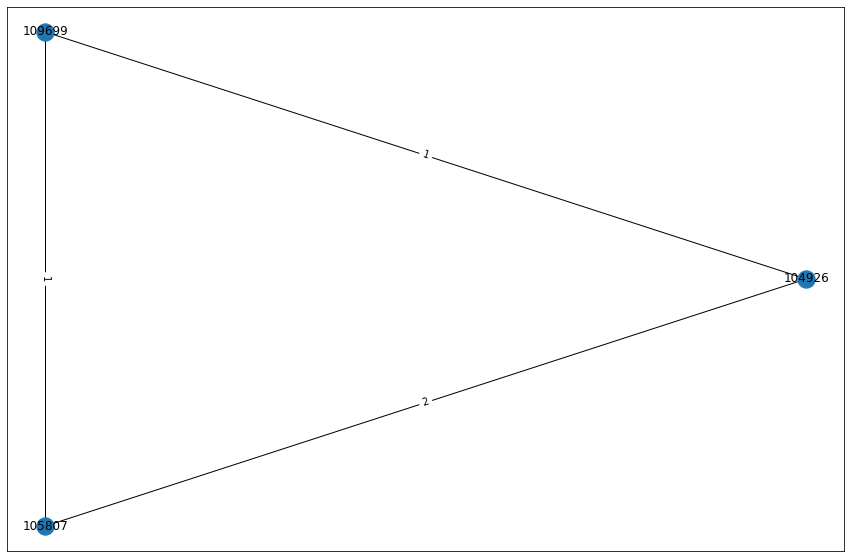

In [18]:
# možemo iskoristiti networkx.draw_network da predstavimo egomrežu tog čvora
ego_mreza = nx.ego_graph(G, '109699')
plt.figure(figsize=(15,10))
tezine_grana = nx.get_edge_attributes(ego_mreza,'weight')
pos = nx.circular_layout(ego_mreza)
#pos = nx.spring_layout(ego_mreza)
#print(pos)
nx.draw_networkx(ego_mreza, pos)
nx.draw_networkx_edge_labels(ego_mreza, pos, edge_labels = tezine_grana)

Asortativnost:
Homofilija - tendencija ljudi da stvaraju veze sa sebi slicnim ljudima
U analizi socijalnih mreze homofilija u formi asortativnosti - cvorovi imaju tendenciju da se povezuju sa cvorovima slicnog stepena

In [19]:
# asortativnost na osnovu netežinskog stepena čvora
r1 = nx.degree_assortativity_coefficient(G)
print(f"Koeficijent asortativnosti na osnovu netežinskog stepena čvora: {r1}")

# asortativnost na osnovu težinskog stepena čvora
#r2 = nx.degree_assortativity_coefficient(G, weight='weight')
#print(f"Koeficijent asortativnosti na osnovu težinskog stepena čvora: {r2}")

# asortativnost na osnovu drzave
r3 = nx.attribute_assortativity_coefficient(G, 'country')
print(f"Koeficijent asortativnosti na osnovu drzave: {r3}")

# asortativnost na osnovu ranga
r4 = nx.attribute_assortativity_coefficient(G, 'rank')
print(f"Koeficijent asortativnosti na osnovu ranga: {r4}")


Koeficijent asortativnosti na osnovu netežinskog stepena čvora: 0.16919387110544537
Koeficijent asortativnosti na osnovu drzave: 0.009843043206048575
Koeficijent asortativnosti na osnovu ranga: -0.0038445015097198754


11)U kojoj meri teniseri imaju tendenciju da se susreću sa istim teniserima? Da li na to utiče njihovo rangiranje na ATP listi?

In [20]:
player_tendency_factors = {}
for player_id in G:
    if G.degree(player_id) != 0:
        player_tendency_factors[player_id] = G.degree(player_id, weight='weight') / G.degree(player_id)
    else:
        player_tendency_factors[player_id] = 0

avg_player_tendency_factor = sum(degreeview[1] for degreeview in G.degree(weight='weight')) / sum(degreeview[1] for degreeview in G.degree())


# effect on ranking
ranks = nx.get_node_attributes(G, 'rank')
data_final = []
for player_id in G:
    data_final.append((player_id, nx.get_node_attributes(G, 'name')[player_id], player_tendency_factors[player_id], ranks[player_id]))
df = pd.DataFrame(data_final, columns=['player_id', 'full_name', 'player_tendency_factors', 'rank'])
df.sort_values(by='player_tendency_factors', ascending=False, inplace=True)


In [21]:
print("Prosecan odnos tezinskih u odnosu na netezinske grane u celom grafu: " + str(avg_player_tendency_factor))
df.head(n=10)


Prosecan odnos tezinskih u odnosu na netezinske grane u celom grafu: 1.1995309568480301


,player_id,full_name,player_tendency_factors,rank
404,104925,Novak Djokovic,1.962500,1
438,126774,Stefanos Tsitsipas,1.757576,6
182,106233,Dominic Thiem,1.728261,3
378,100644,Alexander Zverev,1.721053,7
179,103819,Roger Federer,1.702703,5
496,106421,Daniil Medvedev,1.690722,4
216,104745,Rafael Nadal,1.634146,2
309,106043,Diego Schwartzman,1.605556,9
340,105676,David Goffin,1.600000,15
513,133430,Denis Shapovalov,1.576087,12


In [22]:
#12 Koji teniseri predstavljaju jezgro mreze?
core_number = nx.core_number(G)
print(core_number)#dict

max_core_number = max(core_number.values()) #max value u dict
print(max_core_number)

core = nx.k_core(G, max_core_number)
for player_id in core:
    print(player_id, nx.get_node_attributes(G, 'name')[player_id], nx.get_node_attributes(G, 'rank')[player_id])

{'105453': 35, '108772': 1, '105807': 35, '122078': 3, '200273': 3, '105497': 4, '105311': 35, '105707': 2, '105841': 3, '105691': 1, '205734': 11, '207421': 1, '108739': 3, '144707': 20, '200436': 4, '106227': 1, '127326': 1, '105688': 2, '105606': 1, '202090': 3, '106247': 1, '208108': 1, '200267': 1, '105954': 1, '124154': 1, '200526': 1, '209119': 1, '105147': 5, '105589': 9, '105870': 16, '144985': 1, '144760': 4, '104180': 21, '106045': 33, '105827': 4, '111515': 3, '207852': 1, '105434': 2, '200282': 35, '120424': 19, '106005': 5, '111805': 1, '206703': 2, '104932': 2, '105502': 1, '104607': 34, '122669': 4, '126174': 1, '126205': 30, '126120': 4, '126663': 1, '105479': 1, '106368': 16, '209238': 1, '104672': 2, '105334': 1, '111456': 34, '105173': 35, '111460': 8, '207972': 1, '144826': 2, '105385': 15, '200620': 2, '104735': 1, '105063': 3, '202358': 4, '111513': 35, '105906': 2, '207680': 1, '127157': 7, '105359': 16, '123768': 1, '104882': 10, '134114': 1, '105757': 3, '1339

104925 Novak Djokovic 1
105138 Roberto Bautista Agut 13
104468 Gilles Simon 63
105332 Benoit Paire 28
103852 Feliciano Lopez 64
105932 Nikoloz Basilashvili 40
106415 Yoshihito Nishioka 56
104755 Richard Gasquet 47
104871 Jeremy Chardy 75
105936 Filip Krajinovic 31
105732 Pierre Hugues Herbert 83
106432 Borna Coric 24
111797 Nicolas Jarry 989
105554 Daniel Evans 32
104731 Kevin Anderson 81
111202 Hyeon Chung 161
111575 Karen Khachanov 20
105683 Milos Raonic 14
126203 Taylor Fritz 29
105550 Guido Pella 43
126207 Frances Tiafoe 59


In [23]:
#13 Ko su teniseri koji povezuju razlicite grupe u okviru mreze -> pronalazimo bridgeve u ovkviru mreze grane koje povezuju razlicite grupe u okviru mreze
bridges = nx.bridges(G)
bridges_list = list(bridges)
print(len(bridges_list))
for branch in bridges_list:
    print(branch)
    print(nx.get_node_attributes(G, 'name')[branch[0]], nx.get_node_attributes(G, 'name')[branch[1]])

163
('108772', '105311')
Julius Tverijonas Joao Sousa
('200273', '134120')
Hady Habib Kuan Yi Lee
('105691', '105683')
Scott Griekspoor Milos Raonic
('207421', '106397')
Alex Fairbanks Wishaya Trongcharoenchaikul
('200436', '106333')
Zsombor Piros Julien Cagnina
('106227', '104810')
Ji Sung Nam Zhe Li
('127326', '123795')
Ben Patael Altug Celikbilek
('105688', '200619')
Manuel Sanchez Sebastian Arcila
('105606', '138846')
Mohsen Hossein Zade Hong Kit Jack Wong
('106247', '103529')
Nik Razborsek Aisam Ul Haq Qureshi
('208108', '111815')
Brian Shi Cameron Norrie
('200267', '105077')
Zizou Bergs Albert Ramos
('105954', '100644')
Peter Nagy Alexander Zverev
('124154', '106121')
Sasi Kumar Mukund Taro Daniel
('200526', '105877')
Juan Lugo Emilio Gomez
('209119', '144775')
Aissa Benchakroun Linh Giang Trinh
('144985', '105376')
Ergi Kirkin Peter Gojowczyk
('207852', '202358')
Wai Yu Kai Chun Hsin Tseng
('207852', '209874')
Wai Yu Kai Maks Kasnikowski
('111805', '103499')
Seong Chan Hong Aqee

14. Kolika je gustina svake od modelovanih mreza? 
Gustina mreza moze se odrediti iz Gephi alata (Statistics -> Graph density) 
Racuna se za neusmerene grafove kao d = (2m)/n(n-1)
m -> broj grana
n -> broj cvorova

Rezultat:
<img src="img/graph_density_all.png" width=1000 height=1000 />

In [24]:
#koristeci python i networkx
density = nx.density(G)
print(f"Gustina mreze koristeci biblioteku network x je: {density}")


Gustina mreze koristeci biblioteku network x je: 0.03163392486200962


In [44]:
#15 U kojoj mrezi povezane i centralizovane mreze
#izracunacemo degree_centrality, closeness_centrality, information_centrality, betweenes_centrality i opisacemo znacenje tih vrednosti
print("Degree centrality:")
DC = nx.degree_centrality(G)
import operator
dc_items = sorted(DC.items(), key=operator.itemgetter(1), reverse=True)[:5]
print(dc_items)
for dc_item in dc_items:
    node = dc_item[0]
    print(nx.get_node_attributes(G, 'name')[node], nx.get_node_attributes(G, 'rank')[node], nx.get_node_attributes(G, 'country')[node], G.degree[node])
#vazni cvorovi imaju veliki broj konekcija; broj direktnih suseda svakog cvora u mrezi
#akteri u mrezi sa vecim brojem relacija manje zavisni u odnosu na druge aktere

print("Closeness centrality:")
CC = nx.closeness_centrality(G)
cc_items = sorted(CC.items(), key=operator.itemgetter(1), reverse=True)[:5]
print(cc_items)
for cc_item in cc_items:
    node = cc_item[0];
    print(nx.get_node_attributes(G, 'name')[node], nx.get_node_attributes(G, 'rank')[node], nx.get_node_attributes(G, 'country')[node])
#vazni cvorovi su blizi drugim cvorovima, vazniji cvorovi centralniji polozaj u mrezi

print("Betweenness centrality:")
BC = nx.betweenness_centrality(G)
bc_items = sorted(BC.items(), key=operator.itemgetter(1), reverse=True)[:5]
print(bc_items)
for bc_item in bc_items:
    node = bc_item[0];
    print(nx.get_node_attributes(G, 'name')[node], nx.get_node_attributes(G, 'rank')[node], nx.get_node_attributes(G, 'country')[node])
#vazni cvorovi povezuju druge cvorove, mostovi posrednici izmedju ostalih cvorova u mrezi
#vazni cvorovi se nalaze na vecem broju najkracih putanja

#check if graph is connected
print(nx.is_connected(G))

#graf nije povezan ne moze se izracunati information_centrality
#nije povezan postoji grupa ljudi koji nisu igrali jedni sa drugima -> ne postoji protok informacija

Degree centrality:
[('111575', 0.17758620689655172), ('126774', 0.1706896551724138), ('106421', 0.16724137931034483), ('104926', 0.16551724137931034), ('100644', 0.16379310344827586)]
Karen Khachanov 20 RUS 103
Stefanos Tsitsipas 6 GRE 99
Daniil Medvedev 4 RUS 97
Fabio Fognini 17 ITA 96
Alexander Zverev 7 GER 95
Closeness centrality:
[('111575', 0.4315643185963693), ('126774', 0.4272594376128644), ('104792', 0.42338805885360453), ('100644', 0.4213058224985868), ('105583', 0.41992900608519274)]
Karen Khachanov 20 RUS
Stefanos Tsitsipas 6 GRE
Gael Monfils 11 FRA
Alexander Zverev 7 GER
Dusan Lajovic 26 SRB
Betweenness centrality:
[('126774', 0.06815305924680275), ('104655', 0.05158412021253739), ('105657', 0.04319249685543866), ('106150', 0.03415969729691954), ('106233', 0.029600406712562918)]
Stefanos Tsitsipas 6 GRE
Pablo Cuevas 67 URU
Marius Copil 216 ROU
Jeson Patrombon 1463 PHI
Dominic Thiem 3 AUT
False


#habovi su vezani za degree_centrality i susedima onim sa najvecim vrednostima ove metrike iscrtati u gephiju videti TODO

16. Koje su prosecne distance, a koliki dijametar u okviru modelovanih mreza? 
Average Path length: 3.2336087527117874
Diameter: 10

In [45]:
#17. Kakva je distribucija cvorova po stepenu i da li prati neku zakonomernost? Kako je stepen cvora korelisan sa rejtingom tenisera? 
from collections import Counter
from operator import itemgetter

def plot_deg_frequency(G, weighted=False, xscale = "log", yscale = "log"):

    if weighted:
        degrees = G.degree(weight="weight")
    else:
        degrees = G.degree()
    _, deg_list = zip(*degrees)
    deg_counts = Counter(deg_list)        
    print(deg_counts)
    x, y = zip(*deg_counts.items())                                                      

    plt.figure(1)   

    # prep axes   
    if weighted:
        plt.xlabel('weighted degree')  
    else:
        plt.xlabel('degree')                                                                                                             
    plt.xscale(xscale)                                                                                                                
    plt.xlim(1, max(x))  

    plt.ylabel('frequency')                                                                                                          
    plt.yscale(yscale)                                                                                                                
    plt.ylim(1, max(y))                                                                                                             
                                                                                                                                                                                                    
    plt.scatter(x, y, marker='.')                                                                                                    
    plt.show()

Counter({1: 159, 2: 70, 3: 43, 6: 25, 5: 25, 4: 22, 7: 14, 9: 10, 8: 10, 10: 7, 13: 7, 22: 6, 80: 6, 20: 6, 23: 6, 48: 5, 29: 5, 71: 5, 52: 5, 35: 5, 14: 4, 19: 4, 41: 4, 16: 4, 66: 4, 17: 4, 18: 4, 74: 4, 86: 3, 90: 3, 30: 3, 27: 3, 11: 3, 64: 3, 12: 3, 67: 3, 65: 3, 15: 3, 75: 3, 84: 3, 83: 3, 78: 2, 81: 2, 36: 2, 25: 2, 49: 2, 42: 2, 21: 2, 32: 2, 92: 2, 63: 2, 61: 2, 82: 2, 57: 2, 55: 2, 89: 2, 46: 2, 54: 2, 28: 2, 60: 2, 93: 2, 79: 2, 56: 2, 38: 2, 47: 1, 96: 1, 68: 1, 62: 1, 70: 1, 77: 1, 85: 1, 73: 1, 53: 1, 40: 1, 50: 1, 91: 1, 88: 1, 26: 1, 44: 1, 95: 1, 94: 1, 103: 1, 99: 1, 97: 1, 37: 1, 34: 1, 45: 1})


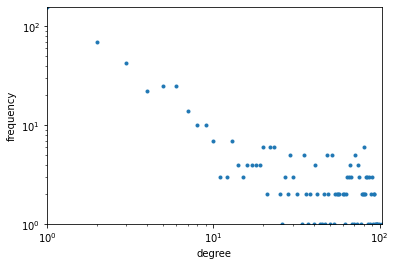

In [27]:
plot_deg_frequency(G)

#raspodela stepena čvora pokazuje da veliki broj čvorova ima stepen 1, odnosno da su igrali samo jedan meč. Sa druge strane, postoji mali broj čvorova sa većim stepenom. 

#ovakvi cvorovi prate power-law (scale-free) raspodelu

Counter({1: 123, 0.5: 51, 2: 40, 1.5: 25, 3: 25, 4.0: 19, 5: 17, 2.5: 16, 3.5: 13, 6: 12, 7.0: 9, 4.5: 8, 17: 7, 9.0: 7, 18.0: 6, 10: 5, 8.0: 5, 7.5: 5, 14.0: 4, 6.5: 4, 120.5: 3, 5.5: 3, 9.5: 3, 58.5: 3, 13: 3, 25: 3, 34.5: 3, 74.0: 3, 16: 3, 39.5: 3, 13.5: 3, 29.0: 3, 21.5: 3, 12.0: 3, 22.5: 2, 22.0: 2, 50.0: 2, 18.5: 2, 10.5: 2, 81.0: 2, 91.5: 2, 96.0: 2, 64.0: 2, 57.0: 2, 68.5: 2, 41.0: 2, 31.5: 2, 16.5: 2, 36: 2, 31: 2, 46.0: 2, 102.5: 2, 38.5: 2, 15.5: 2, 117.5: 2, 94.0: 2, 71.5: 2, 110.5: 1, 115.0: 1, 25.5: 1, 28: 1, 118.5: 1, 45: 1, 24.0: 1, 124.5: 1, 83.0: 1, 93.0: 1, 85.0: 1, 125.5: 1, 8.5: 1, 131.5: 1, 60.0: 1, 48.0: 1, 80.0: 1, 105.5: 1, 101.0: 1, 21: 1, 92.0: 1, 54.0: 1, 93.5: 1, 20: 1, 69.0: 1, 37.5: 1, 126.0: 1, 159.0: 1, 53.0: 1, 65.0: 1, 17.5: 1, 111.5: 1, 134.0: 1, 97.0: 1, 64.5: 1, 111.0: 1, 55.5: 1, 53.5: 1, 88: 1, 123.5: 1, 50.5: 1, 124.0: 1, 26.0: 1, 61: 1, 117.0: 1, 109.5: 1, 114.5: 1, 144.5: 1, 23.5: 1, 47.5: 1, 48.5: 1, 100.5: 1, 23.0: 1, 120.0: 1, 113.5: 1, 80

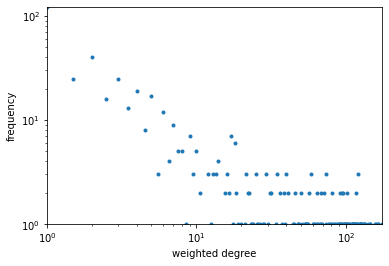

In [28]:
#graf je tezinski trebalo bi i ispitati i raspodelu po stepenu tezinskog grafa
plot_deg_frequency(G, weighted = True)

In [47]:
#kako je stepen cvora korelisan sa rejtingom tenisera
#izracunati stepen cvora i u svakom cvoru cuvamo rang sortirati tu listu po opadajucoj vrednosti ranga i ispisati zakljucke
for node in G.nodes:
    print(nx.get_node_attributes(G, 'name')[node], nx.get_node_attributes(G, 'rank')[node], nx.get_node_attributes(G, 'country')[node], G.degree(node, weight="weight"))
    
    
#veci rang veci stepen cvora; Igraci sa vecim rangom imaju veci stepen cvora

Kei Nishikori 41 JPN 110.5
Julius Tverijonas 830 LTU 0.5
Pablo Carreno Busta 16 ESP 120.5
Dmitry Popko 170 KAZ 3.5
Hady Habib 751 LIB 6
Jose Hernandez 316 DOM 5.5
Joao Sousa 90 POR 115.0
Nicolaas Scholtz 9223372036854775807 RSA 2
Lorenzo Giustino 152 ITA 1.5
Scott Griekspoor 694 NED 1
Thiago Seyboth Wild 116 BRA 9.5
Alex Fairbanks 9223372036854775807 SRI 1
Wilfredo Gonzalez 1123 GUA 4.0
Mikael Ymer 94 SWE 25.5
Zsombor Piros 436 HUN 5
Ji Sung Nam 270 KOR 1
Ben Patael 578 ISR 0.5
Manuel Sanchez 852 MEX 5.0
Mohsen Hossein Zade 9223372036854775807 IRI 1
Adrian Andreev 561 BUL 2.5
Nik Razborsek 729 SLO 0.5
Brian Shi 9223372036854775807 USA 0.5
Zizou Bergs 437 BEL 0.5
Peter Nagy 555 HUN 1
Sasi Kumar Mukund 300 IND 0.5
Juan Lugo 9223372036854775807 VEN 1
Aissa Benchakroun 1722 MAR 0.5
Tatsuma Ito 186 JPN 5.0
Gerald Melzer 1104 AUT 10
Yannick Hanfmann 99 GER 14.0
Ergi Kirkin 444 TUR 1
Amine Ahouda 1639 MAR 4
Gilles Muller 9223372036854775807 LUX 28
Denis Kudla 114 USA 58.5
Laurynas Grigelis 42

David Souto 9223372036854775807 VEN 1
Kasidit Samrej 1030 THA 1
Hyeon Chung 161 KOR 61
Calvin Hemery 468 FRA 6
Taylor Fritz 29 USA 117.0
Carlos Alcaraz Garfia 141 ESP 1.0
Brayden Schnur 208 CAN 13.5
Oscar Otte 140 GER 9.0
Frances Tiafoe 59 USA 109.5
Mehluli Don Ayanda Sibanda 775 ZIM 2.5
Albert Ramos 46 ESP 114.5
Nicolas Mejia 457 COL 1
Adam Pavlasek 402 CZE 3
Marcel Granollers 175 ESP 29
Michal Przysiezny 1346 POL 1
Amer Naow 9223372036854775807 SYR 0.5
Jack Mingjie Lin 1345 CAN 1
Lukas Lacko 200 SVK 31
Nam Hoang Ly 705 VIE 0.5
Ilya Ivashka 108 BLR 46.0
Pak Long Yeung 964 HKG 1.5
Guido Andreozzi 163 ARG 29
Michel Saade 9223372036854775807 LIB 1
John Millman 38 AUS 102.5
Diego Schwartzman 9 ARG 144.5
Attila Balazs 92 HUN 18.0
Soon Woo Kwon 95 KOR 23.5
David Agung Susanto 1385 INA 3.5
Ernesto Escobedo 198 USA 13.0
Pavel Kotov 272 RUS 0.5
Steve Darcis 273 BEL 18.5
Go Soeda 133 JPN 5.0
Juan Borba 9223372036854775807 PAR 1
Jeson Patrombon 1463 PHI 5.0
Horacio Zeballos 9223372036854775807 A

18. Da li u mrezi postoje habovi i koji su?
Hubovi predstavljaju najvaznije cvorove. Referenca pitanje 15 i razlicitim izracunatim centralnostima, samo treba ocitati koji su to teniseri

In [30]:
#19. Da li mreza iskazuje osobine malog sveta?

#Mreza nije povezana, pa se ne moze izracunati prosecna udaljenost cvorova, vec je moguce naci najvecu povezanu komponentu pa analizirati nju na osnovu prosecne udaljenosti cvorova koja je izracunata i prema koeficijentu klasterizacije izracunatim za tu najvecu komponentu

print(nx.number_connected_components(G))
largest_connected_component = max(nx.connected_components(G), key=len) #vraca set cvorova
print(len(largest_connected_component))

print("Velicine svih povezanih komponenti: ")
for comp in nx.connected_components(G):
          print(len(comp))

#formiramo graf
graph_connected_component = G.copy()
graph_connected_component.remove_nodes_from(G.nodes()-largest_connected_component)
        
var_path = nx.average_shortest_path_length(graph_connected_component)
print(var_path)
print("Odnos izmedju broja cvorova najvece povezane komponente i ukupnog broja cvorova:")
print((var_path/(len(largest_connected_component)))*100)

print("Prosecan koeficijent klasterizacije")
print(nx.average_clustering(graph_connected_component))

#Posto je koeficijent klasterizacije mali ovo ne ispoljava osobina malog sveta




18
547
Velicine svih povezanih komponenti: 
547
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3.23386302910983
Odnos izmedju broja cvorova najvece povezane komponente i ukupnog broja cvorova:
0.5911998225063675
Prosecan koeficijent klasterizacije
0.19829832679790332


In [31]:
#20. Ego mreze i osobine
#Novak Djokovic 104925
Novak_ego = nx.ego_graph(G, '104925', undirected=True)
Novak_ego.name = "novak"
print(nx.info(Novak_ego))

#Roger Federer 103819
Roger_ego = nx.ego_graph(G, '103819', undirected=True)
Roger_ego.name = "roger"
print(nx.info(Roger_ego))

#Rafael Nadal 104745
Nadal_ego = nx.ego_graph(G, '104745', undirected=True)
Nadal_ego.name = "nadal"
print(nx.info(Nadal_ego))

#sacuvaj u odredjenom formatu
nx.write_gexf(Novak_ego, "models/djokovic_all.gexf")
nx.write_gexf(Roger_ego, "models/federer_all.gexf")
nx.write_gexf(Nadal_ego, "models/nadal_all.gexf")

#unija Djokovic Federer Nadal
ego_union = nx.disjoint_union(Novak_ego, Roger_ego)
ego_union = nx.disjoint_union(Nadal_ego, Nadal_ego)

ego_graphs = [Novak_ego, Roger_ego, Nadal_ego]

ego_player_nadal_djokovic_federer = set()

for H in ego_graphs:
    for player_id in H: 
        ego_player_nadal_djokovic_federer.add(player_id)
    
print(len(ego_player_nadal_djokovic_federer))
#set objekat je unique, ne dozvoljava duplikate
print(len(skup_id))
#21 analizirati poziciju ego cvora unutar svake od ego mreza TODO(plt.show())
#22 analizirati ugradjenost svake od ego mreza unutar celokupne mreze (TODO)
#23 Unifikacija ego mreza (koliki procenat ucestvuje u njoj). Sprovesti klasterisanje na 3 klastera i na osnovu dobijenih rezultata
#dati interpretaciju kriterijuma pripadnosti klasterima



Name: novak
Type: Graph
Number of nodes: 81
Number of edges: 1314
Average degree:  32.4444
Name: roger
Type: Graph
Number of nodes: 75
Number of edges: 1389
Average degree:  37.0400
Name: nadal
Type: Graph
Number of nodes: 83
Number of edges: 1413
Average degree:  34.0482
136
581


Analiza ugradjenosti svake od ego mreza unutar celokupne mreze (uradjena je u Gephi alatu primenom odgovarajuceg filtera i odgovarajuceg layout-a prikaza za svaki od navedenih cvorova -> unese se id cvora za koji hocemo da prikazemo ego mrezu i primenom odgovarajuceg filtra i nacina prikaza prikaze se jasno definisana struktura ego mreze i njena ugradjenost u celokupnu mrezu) 

Novak Djokovic

<img src="img/graph_ego_djokovic_all.png" width=1000 height=1000 />

Rafael Nadal

<img src="img/graph_ego_nadal_all.png" width=1000 height=1000 />

Roger Federer

<img src="img/graph_ego_roger_all.png" width=1000 height=1000 />



Analiza pozicije svakog ego cvora u okviru sopstvene ego mreze

Novak Djokovic

<img src="img/novak_djokovic_node_all.png" width=1000 height=1000 />

Rafael Nadal

<img src="img/rafael_nadal_node_all.png" width=1000 height=1000 />

Roger Federer

<img src="img/roger_federer_node1_all.png" width=1000 height=1000 />



In [32]:
#23 Analizirati mrezu dobijenu unifikacijom ego mreza clanova Velike trojke. Koji procenat cvorova mreze svih tenisera ucestvuje u njoj. Sprovesti klasterisanje ovako dobijene mreze na 3 klastera i na osnovu dobijenih rezultata dati interpretaciju kriterijuma pripadnosti klasterima

# ego_player_nadal_djokovic_federer igraci iz ego mreza dobijeni njihovom unijom i smesteni u set
# skup_id svi igraci
from networkx.algorithms import community

percentage_ego = (len(ego_player_nadal_djokovic_federer)/len(skup_id))*100
print("Procentualno: ");
print(percentage_ego);

G_copied = G.copy();
G_copied.remove_nodes_from(G.nodes - ego_player_nadal_djokovic_federer)
print(len(G_copied.nodes)) #verifikovano

async_fluids_results = community.asyn_fluidc(G_copied,3, seed = 0) #ovaj algoritam na pocetku izabere nasumicno izabere 3 celine, a onda iterativno dodaje uzimavsi u obzir sam graf i njegove susede. Proces se ponavlja do dostizanja konverfencije
community1 = next(async_fluids_results)
community2 = next(async_fluids_results)
community3 = next(async_fluids_results)
#u zbiru tacno 81
print(len(community1))
print(len(community2))
print(len(community3))
#ispis pripadnosti odgovarajucim cvorovima
print(community1)
print(community2)
print(community3)

#todo formiraj graf u gephiju i analiziraj grupe cvorova koji pripadaju celini

Procentualno: 
23.407917383820998
136
77
34
25
{'105453', '105311', '104291', '126774', '144707', '105526', '106000', '105357', '105062', '126952', '103819', '105147', '200282', '120424', '106378', '105227', '104607', '111576', '111456', '105173', '200005', '104542', '105777', '105676', '105223', '126610', '136440', '106401', '106121', '105916', '105430', '104745', '105657', '105806', '105216', '105449', '104312', '106421', '104999', '200175', '104297', '111577', '126094', '100644', '133430', '109739', '104259', '103607', '104898', '106298', '105373', '103970', '105577', '105815', '104527', '105138', '104468', '105332', '103852', '105932', '104797', '106415', '104755', '104871', '206173', '105936', '105732', '105554', '104731', '111442', '111575', '105683', '106423', '126203', '105550', '106214', '126207'}
{'105902', '105077', '104665', '106210', '200000', '104620', '104919', '105385', '104655', '105882', '105967', '126652', '106432', '106043', '105379', '132283', '134770', '106148', '

In [33]:
import matplotlib.pyplot as plt

def draw_rank_correlation(x_rank, y_rank, x_label, y_label, how="scatter"):                                                    
    plt.figure(num=1, figsize=[10, 5])

    labels = x_rank
    plt.xlabel(x_label)
    
    plt.ylabel(y_label)                                                                                                          
    plt.yscale('linear')                                                                                                                
    plt.ylim(1, max(y_rank) * 1.1)                                                                                                             
    
    if how == "plot":
        plt.plot(x_rank, y_rank, marker='.')
    else:
        plt.scatter(x_rank, y_rank, marker='.')
    plt.show()

24)Kakva je distribucija broja tenisera u odnosu na broj meceva koji su odigrali?

In [34]:
dataframe_1 = data_all[['winner_id', 'id', 'tourney_date']]
dataframe_1 = dataframe_1.rename(columns = {'winner_id': 'player_id'})
print(dataframe_1)
dataframe_2 = data_all[['loser_id', 'id', 'tourney_date']]
dataframe_2 = dataframe_2.rename(columns = {'loser_id': 'player_id'})
print(dataframe_2)
plot_df = pd.concat([dataframe_1, dataframe_2])
plot_df = plot_df.dropna()
plot_df = plot_df.groupby('player_id').size()
print(plot_df)

      player_id    id  tourney_date
0        105992     0      20180101
1        111577     1      20180101
2        104797     2      20180101
3        200282     3      20180101
4        111581     4      20180101
...         ...   ...           ...
7112     105668  7112      20200306
7113     209874  7113      20200306
7114     208518  7114      20200306
7115     111761  7115      20200306
7116     111761  7116      20200306

[7117 rows x 3 columns]
      player_id    id  tourney_date
0        104919     0      20180101
1        111442     1      20180101
2        106000     2      20180101
3        105449     3      20180101
4        105643     4      20180101
...         ...   ...           ...
7112     106388  7112      20200306
7113     207852  7113      20200306
7114     200250  7114      20200306
7115     200181  7115      20200306
7116     208518  7116      20200306

[7117 rows x 3 columns]
player_id
100644    183
103333     58
103499      4
103529      3
103565      4
      

     player_id  numMatches
400     126774         196
0       100644         183
290     106421         183
73      104925         180
256     106233         176
..         ...         ...
154     105578           1
151     105566           1
145     105515           1
443     144775           1
580     209874           1

[581 rows x 2 columns]
     numMatches  numPlayers
0             1         159
1             2          70
2             3          41
3             4          24
4             5          23
..          ...         ...
111         165           1
112         176           1
113         180           1
114         183           2
115         196           1

[116 rows x 2 columns]


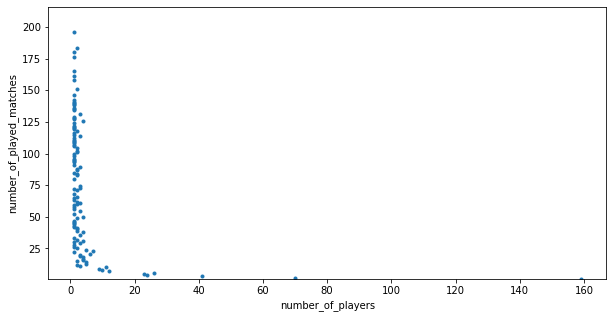

In [35]:
df_tourneys_counts = plot_df.reset_index(name='numMatches')
df_tourneys_counts = df_tourneys_counts.sort_values('numMatches', ascending=False)
df_tourneys_counts = df_tourneys_counts.drop_duplicates()
print(df_tourneys_counts)
df_tourneys_counts_grouped = df_tourneys_counts.groupby('numMatches').size().reset_index(name='numPlayers')
print(df_tourneys_counts_grouped)
draw_rank_correlation(df_tourneys_counts_grouped['numPlayers'], df_tourneys_counts_grouped['numMatches'], 'number_of_players', 'number_of_played_matches', how='scatter')

25)Kakva je distribucija broja turnira u odnosu na podlogu i godinu održavanja?

In [36]:
plot_df = data_all[['tourney_id', 'tourney_name', 'surface', 'tourney_date']]
plot_df = plot_df.dropna()
#extracts the year
plot_df['tourney_date'] = plot_df.apply(lambda row: str(row['tourney_date'])[0:4], axis=1)


  surface  tourneys
0    Clay       101
1   Grass        20
2    Hard       207


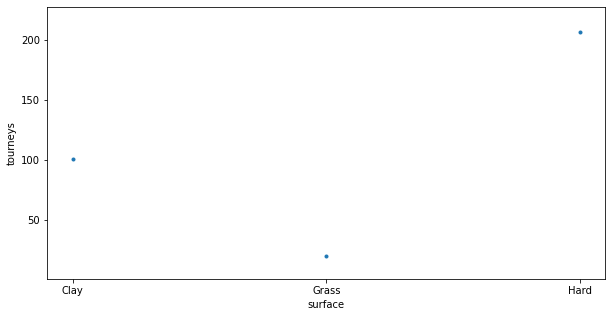

In [37]:
df_tourneys_surfaces = plot_df.groupby(['surface']).agg({'tourney_id': 'nunique'}).reset_index().rename(columns={'tourney_id': 'tourneys'})
print(df_tourneys_surfaces)
draw_rank_correlation(df_tourneys_surfaces['surface'], df_tourneys_surfaces['tourneys'], 'surface', 'tourneys', how='scatter')

  tourney_date  tourneys
0         2018       138
1         2019       123
2         2020        67


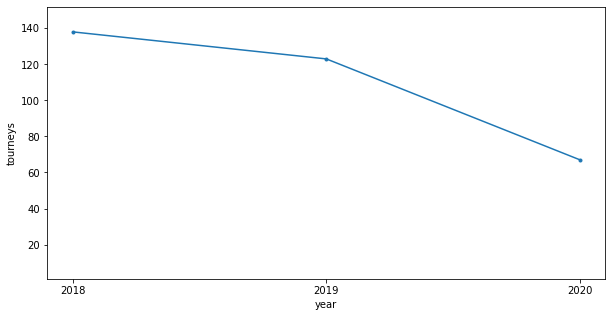

In [38]:
#data for 2018, 2019 and 2020
df_tourneys_years = plot_df.groupby(['tourney_date']).agg({'tourney_id': 'nunique'}).reset_index().rename(columns={'tourney_id': 'tourneys'})
print(df_tourneys_years)
draw_rank_correlation(df_tourneys_years['tourney_date'], df_tourneys_years['tourneys'], 'year', 'tourneys', how='plot')

  surface tourney_date  tourneys        year
0    Clay         2018        47   Clay 2018
1    Clay         2019        34   Clay 2019
2    Clay         2020        20   Clay 2020
3   Grass         2018        10  Grass 2018
4   Grass         2019         9  Grass 2019
5   Grass         2020         1  Grass 2020
6    Hard         2018        81   Hard 2018
7    Hard         2019        80   Hard 2019
8    Hard         2020        46   Hard 2020



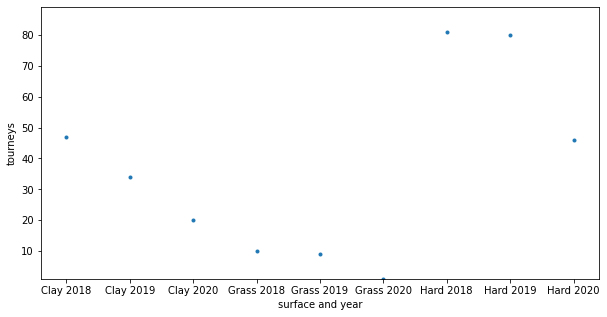

In [39]:
df_tourneys_surface = plot_df.groupby(['surface', 'tourney_date']).agg({'tourney_id': 'nunique'}).reset_index().rename(columns={'tourney_id': 'tourneys'})
df_tourneys_surface['year'] = df_tourneys_surface[['surface', 'tourney_date']].agg(' '.join, axis=1)
print(df_tourneys_surface)
print()
draw_rank_correlation(df_tourneys_surface['year'], df_tourneys_surface['tourneys'], 'surface and year', 'tourneys')

26)Kakva je distribucija broja mečeva u odnosu na podlogu i godinu održavanja?

In [40]:
plot_df = data_all[['tourney_id', 'tourney_name', 'surface', 'tourney_date']]
plot_df = plot_df.dropna()
#extracts the year
plot_df['tourney_date'] = plot_df.apply(lambda row: str(row['tourney_date'])[0:4], axis=1)


  surface  matches
0    Clay     2139
1   Grass      660
2    Hard     4318


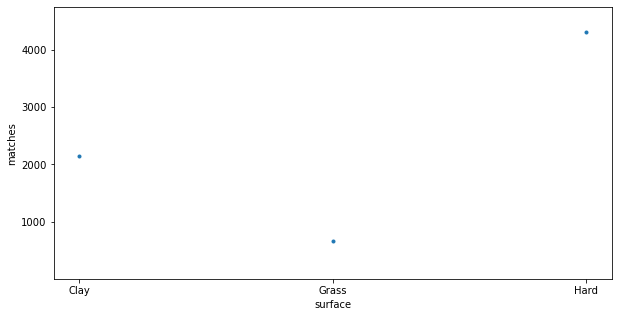

In [41]:
df_matches_surfaces = plot_df.groupby(['surface']).agg({'tourney_id': 'count'}).reset_index().rename(columns={'tourney_id': 'matches'})
print(df_matches_surfaces)
draw_rank_correlation(df_matches_surfaces['surface'], df_matches_surfaces['matches'], 'surface', 'matches', how='scatter')

  tourney_date  matches
0         2018     2974
1         2019     2696
2         2020     1447


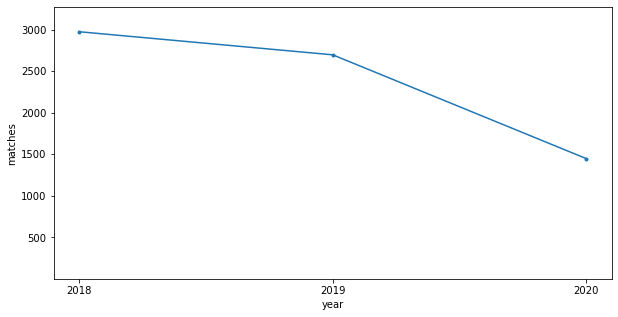

In [42]:
#data for 2018, 2019 and 2020
df_matches_years = plot_df.groupby(['tourney_date']).agg({'tourney_id': 'count'}).reset_index().rename(columns={'tourney_id': 'matches'})
print(df_matches_years)
draw_rank_correlation(df_matches_years['tourney_date'], df_matches_years['matches'], 'year', 'matches', how='plot')

  surface tourney_date  matches        year
0    Clay         2018      897   Clay 2018
1    Clay         2019      828   Clay 2019
2    Clay         2020      414   Clay 2020
3   Grass         2018      331  Grass 2018
4   Grass         2019      327  Grass 2019
5   Grass         2020        2  Grass 2020
6    Hard         2018     1746   Hard 2018
7    Hard         2019     1541   Hard 2019
8    Hard         2020     1031   Hard 2020



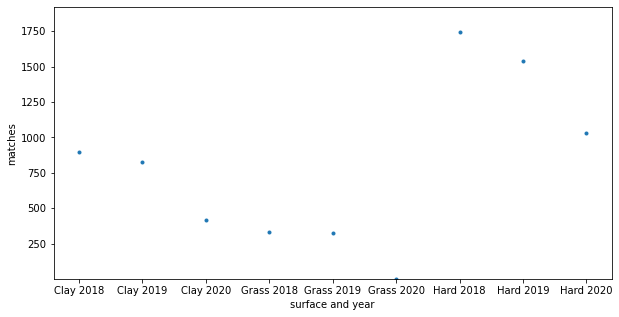

In [43]:
df_matches_surfaces = plot_df.groupby(['surface', 'tourney_date']).agg({'tourney_id': 'count'}).reset_index().rename(columns={'tourney_id': 'matches'})
df_matches_surfaces['year'] = df_matches_surfaces[['surface', 'tourney_date']].agg(' '.join, axis=1)
print(df_matches_surfaces)
print()
draw_rank_correlation(df_matches_surfaces['year'], df_matches_surfaces['matches'], 'surface and year', 'matches')